In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d

# Q2 - Adding features

## (a) 

## Setting up data

In [70]:
carData = pd.read_csv("fordFocus.csv")
carData.head()

,year,model,price,mileage,color,transmission
0,2010,SES,16995,40539,Black,AUTO
1,2010,SEL,15889,24920,Black,AUTO
2,2010,SE,15499,7784,Black,AUTO
3,2010,SE,15499,35636,Black,AUTO
4,2011,SE,14992,4867,Black,AUTO


## Creating linear regression model

### Adding features and splitting data

In [71]:
features = ['year','mileage']
XTrain, XTest, YTrain, YTest = train_test_split(
    carData[features],
    carData.price,
    test_size=0.2,
)

### Training the model and creating a prediction

In [72]:
model = LinearRegression()
model.fit(XTrain.values,YTrain)
prediction = model.predict(XTest.values)

### Plotting data 

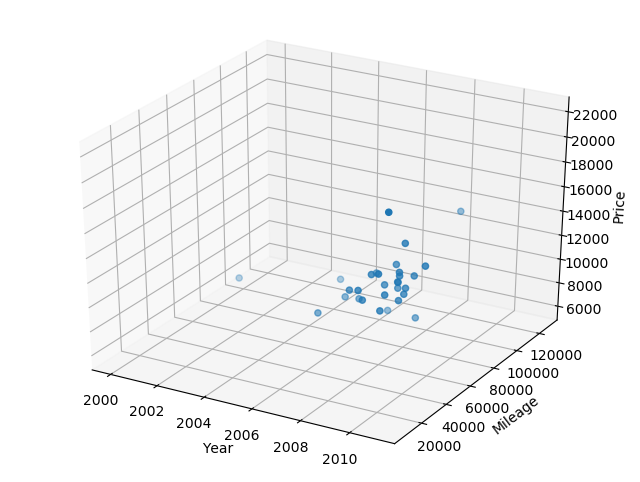

In [91]:
figure = plt.figure(figsize=(8,6))
axel = figure.add_subplot(projection="3d")
axel.scatter(XTest.year,XTest.mileage,YTest)
axel.set_xlabel('Year')
axel.set_ylabel('Mileage')
axel.set_zlabel('Price')

plt.show()

### Computing R^2 and MSE 

In [ ]:
# print('Intercept: \n', model.intercept_)
# print('Coefficients: \n', model.coef_)
# print('RMSE: ', np.sqrt(mean_squared_error(prediction,YTest)))
# print('R squared: ',model.score(XTest.values,YTest))

### Comparison with previous model

## (b)